In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sa
import mysql.connector
from setup import setup
connector = setup()

Current time:  2023-06-11 18:47:51


In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [4]:
descr_query = sa.text(
    "select * from processed_description;"
)
descr = pd.read_sql_query(descr_query, con=connector.connect())

rating_query = sa.text(
    "select average_rating from books;"
)
ratings = pd.read_sql_query(rating_query, con=connector.connect())

book_query = sa.text(
    "select goodreads_book_id as book_id, title from books;"
)
books = pd.read_sql_query(book_query, con=connector.connect())

In [5]:
from models.tfidf import TfidfModel

In [6]:
model = TfidfModel(descr, 'goodreads_book_id', 'processed_descr')
model.fit()

In [7]:
ratings = pd.read_csv('./data/main/ratings_train.dat', sep=':', header=None)
user_1 = ratings.loc[ratings[0] == 1]

ratings_test = pd.read_csv('./data/main/ratings_test.dat', sep=':', header=None)
user_1_test = ratings_test.loc[ratings_test[0] == 1]

In [8]:
uitems = user_1[1].astype(int).tolist()
uratings = user_1[2].tolist()

In [9]:
uitems_test = user_1_test[1].astype(int).tolist()
uratings_test = user_1_test[2].tolist()

In [10]:
model.update_user(uitems, uratings)
model.get_personal_recommendations(10)

[12507214,
 16007855,
 165030,
 15768191,
 182496,
 22725443,
 22571699,
 714569,
 16074758,
 5292853]

In [11]:
model.mse(uitems_test, uratings_test)

1.018951827519307

In [14]:
user_list = ratings[0].unique()

In [17]:
len(user_list)

53422

In [20]:
mse = []
for user in user_list[:1000]:
    profile = ratings.loc[ratings[0] == user]
    profile_test = ratings_test[ratings_test[0] == user]
    uitems = profile[1].astype(int).tolist()
    uratings = profile[2].tolist()
    uitems_test = profile_test[1].astype(int).tolist()
    uratings_test = profile_test[2].tolist()
    model.update_user(uitems, uratings)
    mse.append(model.mse(uitems_test, uratings_test))

In [23]:
sum(mse)/1000

1.0320841652944746

In [16]:
# def dbscan_clustering(data, start, stop, metric):
#     result = []
#     eps = range(start,stop)
#     for ep in eps:
#         dbscan = DBSCAN(eps=ep*0.01, metric=metric, min_samples=2, n_jobs=4).fit(data)
#         labels = np.array(dbscan.labels_)
#         unique, counts = np.unique(labels, return_counts=True)
#         result.append(dict(zip(unique, counts)))
#         unlabeled = [value[-1] for value in result]
#         clusters = [list(value.keys())[-1] for value in result]
#     return eps, result, unlabeled, clusters 

In [17]:
# def plot_line(eps, clusters):
#     fig, ax = plt.subplots()
#     # Plot the data
#     ax.plot(eps, clusters, 'b-', linewidth=2, label='no. clusters')
#     # ax.plot(eps, unlabeled, 'r-', linewidth=2, label='no clusters')
#     # Set labels and title
#     ax.set_xlabel('eps')
#     ax.set_ylabel(' ')
#     ax.set_title('Plotting a Line')

#     # Add a legend
#     ax.legend()

#     # Display the plot
#     plt.show()


In [18]:
# sample_eps, sample_result, sample_labels, sample_clusters = dbscan_clustering(tfidf_matrix, 40, 80, 'euclidean')
# plot_line(sample_eps, sample_clusters)

In [19]:
# sample_eps, sample_result, sample_unlabeled, sample_clusters = dbscan_clustering(outliers_0, 78, 90)
# plot_line(sample_eps, sample_clusters)

In [44]:
# def AggClustering(data, **kargs):
#     model = AgglomerativeClustering(**kargs).fit(data)
#     unique, counts = np.unique(model.labels_, return_counts=True)
#     result = dict(zip(unique, counts))
#     return model, result, model.labels_

In [21]:
# def plot_dict(data):
#     lists = sorted(data.items()) # sorted by key, return a list of tuples
#     x, y = zip(*lists) # unpack a list of pairs into two tuples
#     plt.plot(x, y)
#     plt.show()

In [47]:
# def plot_dendrogram(model, **kwargs):
#     counts = np.zeros(model.children_.shape[0])
#     n_samples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         current_count = 0
#         for child_idx in merge:
#             if child_idx < n_samples:
#                 current_count += 1  # leaf node
#             else:
#                 current_count += counts[child_idx - n_samples]
#         counts[i] = current_count

#     linkage_matrix = np.column_stack(
#         [model.children_, model.distances_, counts]
#     ).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)

In [ ]:
parameters = {
    'n_clusters': None,
    'metric': 'euclidean',
    'linkage': 'ward',
    'distance_threshold': 1.38,
    'compute_distances': True
}
aggClusterModel, result, labels = AggClustering(tfidf_matrix.toarray(), **parameters)
plot_dict(result)

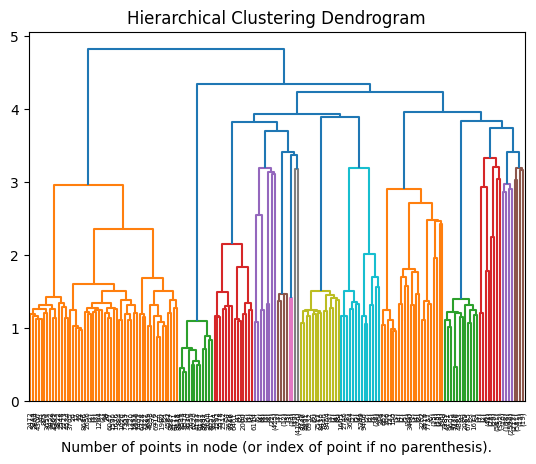

In [74]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(aggClusterModel, truncate_mode='level', p=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
# x_new = SelectKBest(chi2, k=4000).fit_transform(tfidf_matrix, labels)
# model.change_tfidf_scores(x_new)
# recommends = model.get_recommendations(3, 10)
# books.iloc[indices[recommends]]

In [212]:
ratings_test = pd.read_csv('./data/main/ratings_test.dat', sep=':', header=None)
user_1_test = ratings_test.loc[ratings_test[0] == 1]

In [200]:
user_1 = ratings.loc[ratings[0] == 1]

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
from scipy import sparse

In [104]:
scaler = MinMaxScaler()

In [260]:
def get_feature_vectors(data, ids=[]):
    if ids:
        result_vectors = []
        for id in ids:
            result_vectors.append(data[indices[id]])
        return ids, sparse.vstack(result_vectors)
    else:
        return indices.index, data

In [206]:
user_items = user_1[1].astype(int).tolist()
items_vectors = get_feature_vectors(tfidf_matrix, user_items)
# user_ratings = np.array(user_1[2])
# user_ratings = MinMaxScaler().fit_transform(user_ratings.reshape(-1,1)).flatten()

In [216]:
user_items_test = user_1_test[1].astype(int).tolist()
items_vectors_test = get_feature_vectors(tfidf_matrix, user_items_test)

In [160]:
from sklearn.linear_model import Ridge

In [213]:
clf = Ridge(alpha=1, fit_intercept=True)
clf.fit(items_vectors, user_1[2])

Ridge(alpha=1)

In [214]:
coef = clf.coef_

In [215]:
clf.intercept_

3.6082213563841217

In [223]:
pred = clf.predict(tfidf_matrix)

In [224]:
pred

array([3.51422017, 3.52767666, 3.58886104, ..., 3.61542664, 3.59080375,
       3.52868611])

In [220]:
from sklearn.metrics import mean_squared_error as MSE

In [222]:
MSE(pred, user_1_test[2])

1.0575771594352301

In [252]:
user_items = user_1[1].tolist()

In [258]:
a = []
for id in books.book_id.astype(int).tolist():
    if id not in user_items:
        a.append(id)

In [261]:
ids, remained = get_feature_vectors(tfidf_matrix, a)

In [267]:
predicts = clf.predict(remained)
pre_dict = dict(zip(ids, predicts))

In [280]:
list(dict(sorted(pre_dict.items(), key=lambda item: item[1],reverse=True)[:5]).keys())

[165030, 5231173, 14096, 22725443, 682804]

In [277]:
books.iloc[indices[165030]]

book_id                                   165030
title      Anybody Out There? (Walsh Family, #4)
Name: 2143, dtype: object